In [1]:
import scanpy as sc
from  os.path import join
import sys
import os
lib = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
lib2 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
lib3 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\data_analysis'
lib4 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
lib5 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\scripts'
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
sys.path.append(lib5)
import os
from os.path import join
import sklearn
from droplet_dataset import *
from utilities import *
from matplotlib import pyplot
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import random
from scipy.stats import pearsonr
from matplotlib.pyplot import figure
from termcolor import colored
import tables



# number of mitochondria reads vs. number of reads

count shape (5981, 23986)


<IPython.core.display.Javascript object>


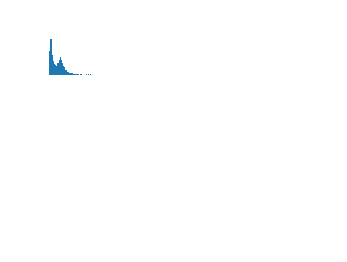

num of mitochondria genes 13
mitochondria genes ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']
pearson correlation  (0.8175328673698923, 0.0)
counting_reads shape  (5981,)
counting_reads shape  (5981,)
number of cell having more than 0.7 mitochondria genes: 125


In [5]:
sample_id = 'M130'
sample = fr'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\Data\rna_seq200k\all_samples\{sample_id}\RNA_sample.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts.T
print(f'count shape {counts.shape}')

fig, axs = plt.subplots(4, 2)

counting_reads = counts.sum(axis=1)
mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)
mit = [s for s in genes if s.startswith('MT-')]
print(f'num of mitochondria genes {len(mit)}')
print(f'mitochondria genes {mit}')
print(f'pearson correlation  {pearsonr(counting_reads, mitochondria_genes)}')
print(f'counting_reads shape  {counting_reads.shape}')
print(f'counting_reads shape  {mitochondria_genes.shape}')



# plot 1 - cell reads intensity
axs[0, 0].hist(counting_reads, bins=150)
axs[0, 0].set_title("cell reads intensity")
axs[0, 0].set_ylabel('number of reads')
axs[0, 0].set_xlabel('indexes')



# plot 2
axs[0, 1].hist(mitochondria_genes, bins=100)
axs[0, 1].set_title("mitochondria reads intensity")
axs[0, 1].set_ylabel('number of reads')
axs[0, 1].set_xlabel('indexes')



# plot 3
axs[1, 0].plot(mitochondria_genes, counting_reads, 'ro')
axs[1, 0].set_title("reads intensity X mitochondria reads intensity")
axs[1, 0].set_xlabel('number of mitochondria reads')
axs[1, 0].set_ylabel('number of reads')


# plot 4
rand = random.choices(range(len(counting_reads)), k=300)
axs[1, 1].plot(mitochondria_genes[rand], counting_reads[rand], 'ro')
axs[1, 1].set_title("reads intensity X mitochondria reads intensity")
axs[1, 1].set_xlabel('number of mitochondria reads')
axs[1, 1].set_ylabel('number of reads')



# plot 5
indexes = np.where(counting_reads<8000)
counting_reads_small = counting_reads[indexes]
mitochondria_genes_small = mitochondria_genes[indexes]
axs[2, 0].plot(mitochondria_genes_small, counting_reads_small, 'ro')
axs[2, 0].set_title("reads intensity X mitochondria reads intensity")
axs[2, 0].set_xlabel('number of mitochondria reads')
axs[2, 0].set_ylabel('number of reads')


# plot 6
indexes = np.where(counting_reads<2000)
rand = random.choices(range(len(sum(indexes))), k=300)
counting_reads_small = counting_reads[indexes][rand]
mitochondria_genes_small = mitochondria_genes[indexes][rand]
axs[2, 1].plot(mitochondria_genes_small, counting_reads_small, 'ro')
axs[2, 1].set_title("reads intensity X mitochondria reads intensity")
axs[2, 1].set_xlabel('number of mitochondria reads')
axs[2, 1].set_ylabel('number of reads')



# plot 7
# indexes = np.where(counting_reads<1000)
counting_reads = counting_reads.astype(np.float64)
mitochondria_genes = mitochondria_genes.astype(np.float64)
res = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)
axs[3, 0].hist(res, bins=40)
axs[3, 0].set_title("retion reads & mitochondria reads")



# plot 8
ratio_of_interest = 0.7
indexes = np.where(res>ratio_of_interest)
axs[3, 1].plot(mitochondria_genes[indexes], counting_reads[indexes], 'ro')
axs[3, 1].set_title(f"ratio higher than {ratio_of_interest}")
axs[3, 1].set_xlabel('number of mitochondria reads')
axs[3, 1].set_ylabel('number of reads')
print(f'number of cell having more than {ratio_of_interest} mitochondria genes: {len(mitochondria_genes[indexes])}')



# number of mitochondria reads vs. number of reads

In [2]:
sample_id = 'M110'
sample = fr'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\Data\rna_seq200k\all_samples\{sample_id}\RNA_sample.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts.T
print(f'count shape {counts.shape}')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\itay\\Desktop\\Technion studies\\Keren Laboratory\\python_playground\\classifying-response-to-immunotherapy\\Data\\rna_seq200k\\all_samples\\M110\\RNA_sample.pkl'

In [20]:
sample_id = 'M109'
sample = fr'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\21.2.21\{sample_id}.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts.T
print(f'count shape {counts.shape}')

count shape (21987, 7832)


In [22]:
data = data[[not aa for aa in data.cells_information.getattr('should_be_removed')]]
cc = data.cells_information.getattr('is_cancer')
mm = data.cells_information.getattr('is_immune')
ss = data.cells_information.getattr('is_stromal')
ind = [cc[ii] or mm[ii] or ss[ii] for ii in range(len(cc))]
sum(ind)/len(ind)
# ind

0.9953503819329127

In [45]:

# for i in range(data[[not aa for aa in ind]].number_of_cells):
#     print()
#     print(data[[not aa for aa in ind]].cells_information[i].cell_type_list)
#     print(data[[not aa for aa in ind]].cells_information[i].conflict_related_cell_types)
#     print(data[[not aa for aa in ind]].cells_information[i].cancer_immune_conflict)

su_barcodes = data[[not aa for aa in ind]].barcodes



In [44]:
INFERCNV_SAMPLES_PATH = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\executions\all_data_31.12.20'
tumor_file = r'infercnv.observations.txt'
with open(join(INFERCNV_SAMPLES_PATH, sample_id, tumor_file), 'r') as f:
    line = f.readline()
    barcodes_length = len(line[:-1].split(' '))
    print(f'number of barcodes {barcodes_length}')
    barcodes = [ii.replace('\"', '') for ii in line.split(' ')]
    barcodes[-1] = barcodes[-1][:-1]

number of barcodes 5711


In [48]:
sorted([barcodes.index(aa) for aa in su_barcodes])


[4901,
 4903,
 4908,
 4910,
 4915,
 4917,
 4919,
 4935,
 4936,
 4938,
 4939,
 4942,
 4943,
 4944,
 4948,
 4950,
 4951,
 4952,
 4953,
 4955,
 4957,
 4958,
 4963,
 4970,
 4971,
 4976,
 4978,
 4988]

In [250]:
# res = np.divide(mitochondria_genes_small, counting_reads_small, out=np.zeros_like(counting_reads_small), where=b!=counting_reads_small)
# np.sort(res)
# res = np.divide(mitochondria_genes_small, counting_reads_small, out=np.zeros_like(counting_reads_small), where=b!=counting_reads_small)
# plt.hist(res, bins=30)
# plt.title("ratio")
# plt.show()



In [192]:
# plot 2
uniform = np.arange(len(counting_reads))
axs[0, 1].plot(uniform, sorted(counting_reads), 'b')
axs[0, 1].set_title("reads distribution")
axs[0, 1].set_ylabel('number of reads')
axs[0, 1].set_xlabel('indexes')

Text(0.5, 1033.1471323529413, 'indexes')

In [18]:
sample_path = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\apoptosis\16.12.20_empty_kept\M100\M100.pkl'


rna_sample = pickle.load(open(sample_path, 'rb'))

In [19]:
sum(rna_sample.cells_information.getattr('is_cancer'))

164